# Tugas Pemrograman AI Genetic Algorithm 
Kelas : IF-43-09

Kelompok : 3

Anggota Kelompok :
1. Ni Made Dwipadini Puspitarini (1301194141)
2. Iqbal Saviola Syah Billhaq		(1301190318)
3. Afrizal Syahruluddin Yusuf		(1301194288)





In [1]:
import matplotlib.pyplot as plt
import math
import random

# Variabel Global

In [2]:
#Variabel Global
probCross = 0.8 #probabilitas untuk crossover
probMut = 0.2 #probabilitas untuk mutasi
lenKrom = 20 #satu kromosom terdiri dari 20 gen
jmlPop = 60 #jumlah populasi
gen = 50 #jumlah generasi
xran = {"min" : -1, "max" : 2} #range untuk nilai x 
yran = {"min" : -1, "max" : 1} #range untuk nilai y

# Procedure dan Function

In [3]:
def fungsi(x, y):
    return((math.cos(x**2) * math.sin(y**2)) + (x + y))

In [4]:
def generate_populasi(lenKrom, n):
    pop = []
    for i in range(n):
        krom = []
        for j in range(lenKrom):
            krom.append(random.randint(0, 1))
        pop.append(krom)
    return pop

In [5]:
def decode_kromosom(krom,xran,yran):
    mid = len(krom)//2 #titik potong untuk kromosom

    #menghitung rumus (g1.(2^-1) + g2.(2^-2) + ... + gi.(2^-i)) untuk x 
    gx = 0
    mid_x = krom[:mid]
    for i in range(1, mid+1):
        gx = gx + (mid_x[i-1] * (2**-i)) 

    #menghitung rumus (g1.(2^-1) + g2.(2^-2) + ... + gi.(2^-i)) untuk y
    gy = 0
    mid_y = krom[mid:]
    for i in range(1, mid+1):
        gy = gy + (mid_y[i-1] * (2**-i))
    
    #menghitung nilai sum 2^-i
    total = sum([2**-(i) for i in range(1, mid+1)])

    x = xran["min"] + (gx * (xran["max"] - xran["min"]) / total)
    y = yran["min"] + (gy * (yran["max"] - yran["min"]) / total)

    return x, y

In [6]:
def fitness_score(x, y):
    return fungsi(x, y) #memaksimalkan nilai fungsi sehingga f = h

In [7]:
#Seleksi orang tua menggunakan teknik tournament selection
def tournament_selection(pop, fitness):
    bestparent = random.sample(list(zip(pop,fitness)),random.randint(2, jmlPop))
    bestparent = sorted(bestparent,key= lambda k:k[1],reverse=True)
    return [bestparent[0][0], bestparent[1][0]]

In [8]:
#Elitisme berfungsi untuk menyimpan 2 kromosom dengan fitness terbaik 
def elitisme(pop, fitness):
    elite = zip(pop, fitness)
    elite = sorted(elite,key= lambda k:k[1],reverse=True)
    return [elite[0][0], elite[1][0]]

In [9]:
#Teknik one point crossover
def crossover(parent1, parent2, probCross):
    child1 = parent1
    child2 = parent2
    if random.random() <= probCross:
        crossPoint = random.randint(1, (lenKrom)-1) #menentukan titik cut off
        child1 = parent1[:crossPoint] + parent2[crossPoint:]
        child2 = parent2[:crossPoint] + parent1[crossPoint:]
    return child1, child2

In [10]:
#Mutasi untuk representasi biner
def mutasi(krom, probMut):
    for i in range(len(krom)):
        if random.random() <= probMut:
            if krom[i] == 0:
                krom[i] = 1
            else:
                krom[i] = 0
    return krom

# Main Program

Gen ke : 1
Kromosom Terbaik : [1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0], fitness : 2.4382512211246596, (x, y) : (0.750733137829912, 0.6089931573802541)
Gen ke : 2
Kromosom Terbaik : [1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0], fitness : 2.4382512211246596, (x, y) : (0.9853372434017595, 0.9863147605083089)
Gen ke : 3
Kromosom Terbaik : [1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], fitness : 2.4581846320330927, (x, y) : (0.9853372434017595, 0.9863147605083089)
Gen ke : 4
Kromosom Terbaik : [1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0], fitness : 2.470574749902071, (x, y) : (0.9912023460410557, 1.0)
Gen ke : 5
Kromosom Terbaik : [1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], fitness : 2.4741549242478826, (x, y) : (0.8914956011730206, 0.9941348973607038)
Gen ke : 6
Kromosom Terbaik : [1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], fitness : 2.4809064162557988, (x, y) : (0.9384164222873901, 1.0)


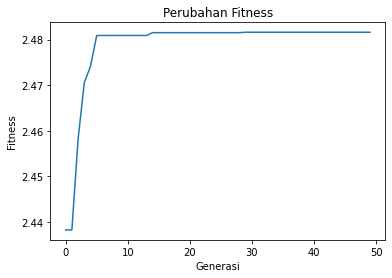

In [11]:
#Main Program
bestfitness = []
pop = generate_populasi(lenKrom, jmlPop)
for i in range(gen):
    fitness = []
    for krom in pop:
        x, y = decode_kromosom(krom, xran, yran)
        fitness.append(fitness_score(x, y))
    bestfitness.append(max(fitness))
    newPop = elitisme(pop, fitness)
    print(f"Gen ke : {i+1}")
    print(f"Kromosom Terbaik : {newPop[0]}, fitness : {max(bestfitness)}, (x, y) : {decode_kromosom(pop[0], xran, yran)}")
    while len(newPop) < jmlPop:
        [parent1, parent2] = tournament_selection(pop.copy(), fitness)
        child1, child2 = crossover(parent1.copy(), parent2.copy(), probCross)
        child1 = mutasi(child1, probMut)
        child2 = mutasi(child2, probMut)
        newPop.append(child1)
        newPop.append(child2)
    pop = newPop

print(" ")    
print("=============================BEST SOLUTION=============================")
best = list(zip(pop, fitness))
print("Fitness Terbaik : ", best[0][1])
print("Kromosom Terbaik : ", best[0][0])
print("(x, y) : ", decode_kromosom(best[0][0], xran, yran))
print(" ")

plt.plot(bestfitness)
plt.title("Perubahan Fitness")
plt.xlabel("Generasi")
plt.ylabel("Fitness")
plt.show()